![ed-5](ed-5.png "Title")
<center><h1>The Lyrics of Ed Sheeran's Songs</h1></center>
<center><h2>A Data Visualisation Exercise</h2></center>

# Abstract
Ed Sheeran is one of the hottest artists today (2019). He is the second artist to have 4 songs [cross 1 billion streams on Spotify](https://www.forbes.com/sites/hughmcintyre/2019/01/18/ed-sheeran-is-the-second-musician-to-see-four-hits-reach-one-billion-streams-on-spotify/#23b5263e5319). In this exercise, I want to see his songwriting prowess, in particular the lyrics he uses in his songs. 

Most of his songs revolve around love like Perfect, Thinking Out Loud and Shape of You. Hence, I expect to see many words that are related to these themes.

# Data Collection
I collected lyrics of 167 songs that belong to Ed Sheeran. This includes all his EPs and album releases. 

In [1]:
import re
from collections import OrderedDict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

sns.set()

In [2]:
# Read from CSV file
df = pd.read_csv('ed-sheeran-lyrics-1.csv', sep='|')
print(df.shape)
print(df.sample())

(167, 2)
                                               lyrics       title
81     Loving can hurt Loving can hurt sometimes B...  photograph


## Study 1 - Using `nltk`'s `word_tokenize` and `PorterStemmer()`
I performed the following steps for this study:
1. Use `word_tokenize` to get all the terms from all songs

2. Use `PorterStemmer()` to get the root form of all words

In [3]:
# Store the song lyrics as a list
lyrics_study1_songlist = df.copy()['lyrics'].tolist()

In [4]:
# The following is a demonstration of the workflow being used.
s1_raw_eg = lyrics_study1_songlist[4]
print(s1_raw_eg)

s2_eg = word_tokenize(s1_raw_eg)
print()
print(s2_eg)

stemmer = PorterStemmer()
s3_eg = [stemmer.stem(t) for t in s2_eg]
print()
print(s3_eg)

   I'm standing on a mountain Waiting for you to come You were sitting counting The days that I had gone The note I wrote I wrapped up in a cigarette Burned away the memories I tried to forget But not yet Wishing my life away But these three words I have to say to you My baby blue You know it's true I love you I love you How can I tell you? I don't know what to say This chance that I won't miss But I miss you anyway I feel your pain It's turning me insane Thrown away I had to take the last train home  But then you came Wishing my life away But these three words I have to say to you My baby blue You know it's true I love you Wishing my life away These three words I have to say to you My baby blue You know it's true You know it's true I love you I love you I love you 

['I', "'m", 'standing', 'on', 'a', 'mountain', 'Waiting', 'for', 'you', 'to', 'come', 'You', 'were', 'sitting', 'counting', 'The', 'days', 'that', 'I', 'had', 'gone', 'The', 'note', 'I', 'wrote', 'I', 'wrapped', 'up', 'in'

In [5]:
# Generate the string for creating the wordcloud
stemmer = PorterStemmer()

wc_string1 = ''
for song_raw in lyrics_study1_songlist[:]:

    song_tokenized = word_tokenize(song_raw)
    song_stemmed = [stemmer.stem(t) for t in song_tokenized]
    wc_string1 = wc_string1 + ' '.join(song_stemmed)

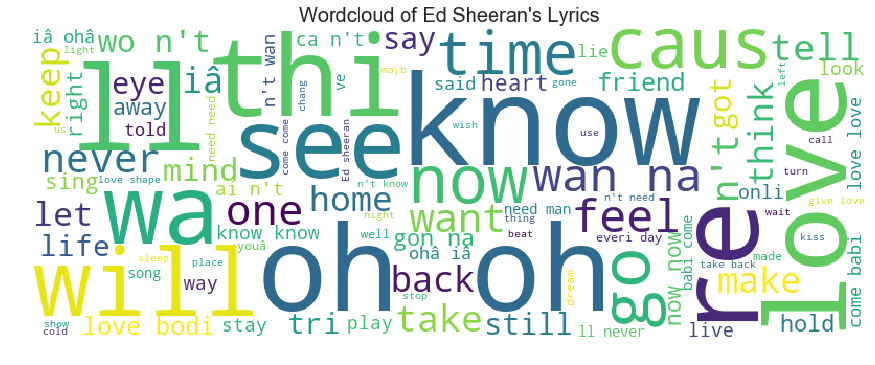

In [6]:
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=100, relative_scaling = 0.8).generate(wc_string1)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()

## Study 1 - Digging Deeper
By observing the wordcloud, some positive and negative patterns emerge. 

The positives :
- relevant words like `know`, `love` have relatively large sizes, implying that they are frequently found in the lyrics. This is a positve sign!

The negatives :
- We see many morphemes e.g. `'ll`, `n't`, `re` which suggests that we need to dig deeper into the `word_tokenizer` and `PorterStemmer`.

To dig deeper, I used `desc_wordcloud.words_` to find the representation of the wordcloud by probabilities.

In [7]:
# Get the word frequency as a dictionary
word_freq1 = desc_wordcloud.words_
word_freq_reps1 = []
for w in sorted(word_freq1, key=word_freq1.get, reverse=True):
    word_freq_reps1.append('%s : %0.2f' % (w, word_freq1[w]))
print(word_freq_reps1)

['know : 1.00', 'oh oh : 0.93', 'll : 0.92', 're : 0.88', 'thi : 0.87', 'love : 0.86', 'see : 0.73', 'wa : 0.73', 'will : 0.70', 'caus : 0.69', 'go : 0.68', 'now : 0.63', 'time : 0.57', 'wan na : 0.55', 'feel : 0.54', 'one : 0.49', 'want : 0.46', 'never : 0.44', "n't : 0.42", 'tell : 0.41', 'take : 0.40', 'back : 0.39', 'make : 0.38', 'iâ : 0.38', 'think : 0.36', 'keep : 0.36', 'home : 0.36', 'let : 0.35', "wo n't : 0.34", 'mind : 0.34', 'eye : 0.33', 'say : 0.33', 'got : 0.33', 'still : 0.32', 'life : 0.31', 'tri : 0.31', 'love bodi : 0.31', 'friend : 0.30', 'gon na : 0.29', 'hold : 0.28', 'away : 0.27', 'heart : 0.27', 'sing : 0.27', 'now now : 0.27', 'right : 0.26', 'way : 0.25', 'know know : 0.25', "ca n't : 0.25", 'play : 0.24', 'onli : 0.24', 'live : 0.24', "ai n't : 0.24", 'stay : 0.23', 'look : 0.22', 'iâ ohâ : 0.22', 'ohâ iâ : 0.22', 'love love : 0.22', 'come babi : 0.22', "n't wan : 0.21", 'told : 0.21', 'babi come : 0.21', 'll never : 0.21', 've : 0.21', 'said : 0.21', 'lie 

A few things become obvious. The wordcloud considered repeats of words as `collocations` is turned on. So bigrams are represented. This will explain the large `oh oh` in the cloud. Let's take it out and see how it changes.

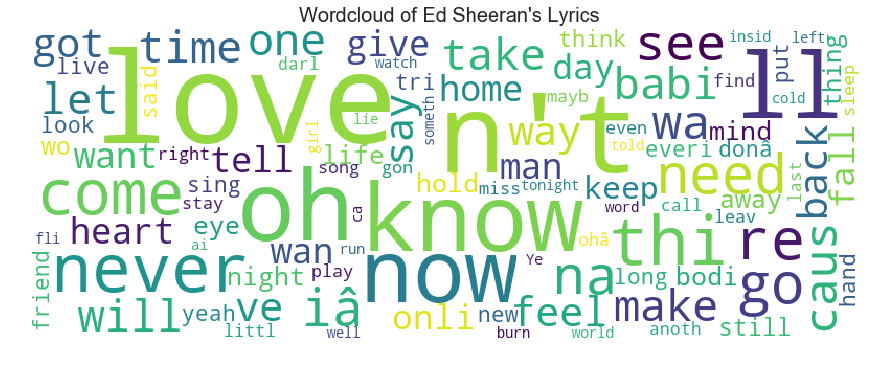

In [8]:
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=100, collocations=False, relative_scaling = 0.8).generate(wc_string1)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()

In [9]:
# Get the word frequency as a dictionary
word_freq2 = desc_wordcloud.words_
word_freq_reps2 = []
for w in sorted(word_freq2, key=word_freq2.get, reverse=True):
    word_freq_reps2.append('%s : %0.2f' % (w, word_freq2[w]))
print(word_freq_reps2)

['love : 1.00', "n't : 0.84", 'oh : 0.72', 'know : 0.67', 'll : 0.65', 'now : 0.61', 'thi : 0.44', 'never : 0.43', 'come : 0.40', 're : 0.37', 'go : 0.35', 'need : 0.34', 'na : 0.33', 'iâ : 0.33', 'see : 0.32', 'wa : 0.30', 'caus : 0.29', 'take : 0.27', 'one : 0.27', 'will : 0.27', 'time : 0.26', 'make : 0.26', 'babi : 0.26', 'let : 0.25', 'back : 0.24', 'way : 0.24', 've : 0.24', 'got : 0.23', 'say : 0.23', 'feel : 0.23', 'heart : 0.19', 'tell : 0.19', 'wan : 0.19', 'man : 0.19', 'home : 0.19', 'give : 0.19', 'want : 0.19', 'onli : 0.18', 'day : 0.18', 'fall : 0.17', 'keep : 0.17', 'night : 0.17', 'eye : 0.17', 'mind : 0.16', 'away : 0.16', 'life : 0.16', 'hold : 0.16', 'bodi : 0.16', 'thing : 0.15', 'wo : 0.14', 'still : 0.14', 'think : 0.14', 'hand : 0.13', 'everi : 0.13', 'sing : 0.13', 'friend : 0.13', 'new : 0.12', 'yeah : 0.12', 'donâ : 0.12', 'look : 0.12', 'tri : 0.12', 'live : 0.12', 'long : 0.12', 'said : 0.11', 'put : 0.11', 'right : 0.11', 'find : 0.11', 'leav : 0.11', 'st

Now that `collocations` is turned off. Term bigrams are removed. The word `oh` is now condensed to a large probability. We now see many morphemes present in the wordcloud. Words like `n't`, `'ll`, `re` etc. are shown. This means that the `word_tokenizer` is not the best way to slice words into terms. Here is an example. Observe how the `'` forces the tokenizer to slice it to 2 terms. We should fix this.

In [10]:
print(word_tokenize("You'll never leave me alone Now I'm off on my own"))

['You', "'ll", 'never', 'leave', 'me', 'alone', 'Now', 'I', "'m", 'off', 'on', 'my', 'own']


## Study 2 - Using `nltk`'s `RegexpTokenizer.tokenize()` and `PorterStemmer()`

Let's use the `RegexpTokenizer` to tokenize words and see if we can get any improvements. Observe that by using the same sentence, the apostrophes are not used to slice words.

In [11]:
regex_tokenizer = RegexpTokenizer('[\w|\']+')
print(regex_tokenizer.tokenize("You'll never leave me alone Now I'm off on my own"))

["You'll", 'never', 'leave', 'me', 'alone', 'Now', "I'm", 'off', 'on', 'my', 'own']


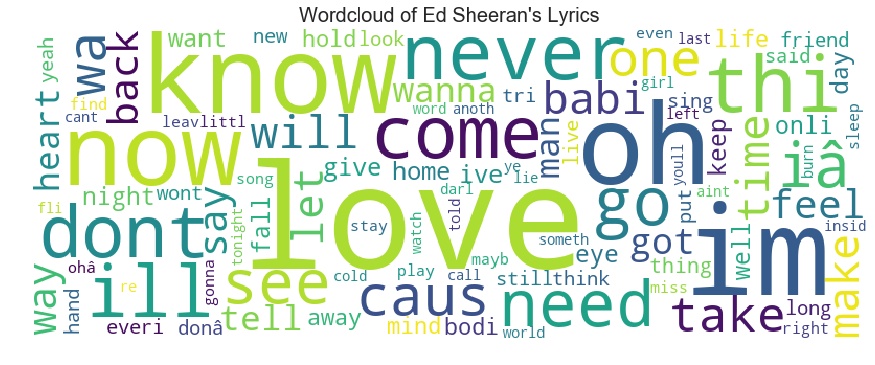

In [12]:
# Generate the string for creating the wordcloud
stemmer = PorterStemmer()
regex_tokenizer = RegexpTokenizer('[\w|\']+')
wc_string2 = ''
for song_raw in lyrics_study1_songlist[:]:
    song_tokenized = regex_tokenizer.tokenize(song_raw)
    song_stemmed = [stemmer.stem(re.sub('\'', '', t)).lower() for t in song_tokenized]
    wc_string2 = wc_string2 + ' '.join(song_stemmed)
    
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=100, collocations=False, relative_scaling = 0.8).generate(wc_string2)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()    

In [13]:
# Get the word frequency as a dictionary
word_freq2 = desc_wordcloud.words_
word_freq_reps2 = []
for w in sorted(word_freq2, key=word_freq2.get, reverse=True):
    word_freq_reps2.append('%s : %0.2f' % (w, word_freq2[w]))
print(word_freq_reps2)

['love : 1.00', 'im : 0.81', 'oh : 0.71', 'know : 0.67', 'now : 0.61', 'thi : 0.44', 'never : 0.43', 'dont : 0.40', 'ill : 0.40', 'come : 0.40', 'go : 0.35', 'need : 0.34', 'iâ : 0.33', 'see : 0.32', 'caus : 0.29', 'wa : 0.28', 'one : 0.27', 'take : 0.27', 'will : 0.27', 'time : 0.26', 'make : 0.26', 'babi : 0.26', 'let : 0.25', 'back : 0.24', 'way : 0.24', 'say : 0.23', 'feel : 0.23', 'got : 0.21', 'heart : 0.20', 'tell : 0.19', 'wanna : 0.19', 'man : 0.19', 'give : 0.19', 'ive : 0.19', 'home : 0.19', 'want : 0.19', 'onli : 0.18', 'day : 0.18', 'fall : 0.17', 'keep : 0.17', 'well : 0.17', 'night : 0.17', 'eye : 0.17', 'mind : 0.16', 'away : 0.16', 'life : 0.16', 'hold : 0.16', 'bodi : 0.16', 'thing : 0.15', 'still : 0.14', 'think : 0.14', 'hand : 0.13', 'everi : 0.13', 'sing : 0.13', 'friend : 0.13', 'new : 0.12', 'yeah : 0.12', 'donâ : 0.12', 'look : 0.12', 'wont : 0.12', 'tri : 0.12', 'live : 0.12', 'long : 0.12', 'said : 0.11', 'put : 0.11', 'right : 0.11', 'find : 0.11', 'leav : 0

It's getting better! There are some other steps taken. The apostrophe is removed from every term. Also, all terms are now in lower case. This is part of the normalisation step. Let's do another step where we remove all words that have a length of $2$ or less.

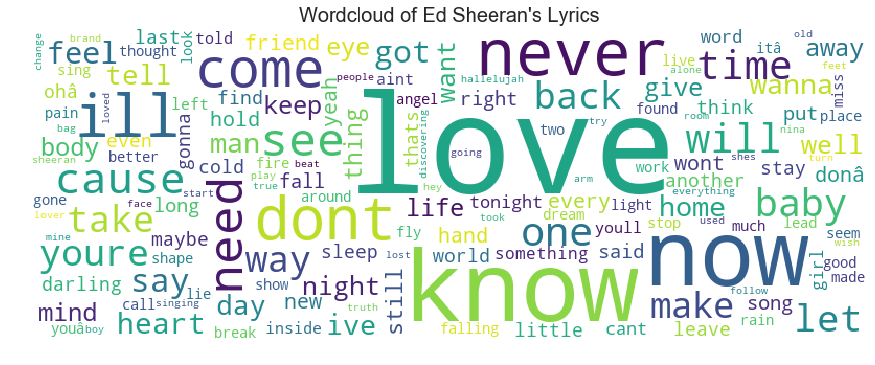

In [14]:
# Generate the string for creating the wordcloud
stemmer = PorterStemmer()
regex_tokenizer = RegexpTokenizer('[\w|\']+')
wc_string2 = ''
for song_raw in lyrics_study1_songlist[:]:
    song_tokenized = regex_tokenizer.tokenize(song_raw)
    song_stemmed = [re.sub('\'', '', t).lower() for t in song_tokenized 
                    if len(re.sub('\'', '', t).lower()) > 2]
    wc_string2 = wc_string2 + ' '.join(song_stemmed)
    
# Create the wordcloud
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(width=800, height=300, background_color="white", 
    max_words=150, collocations=False, relative_scaling = 1).generate(wc_string2)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()    

In [15]:
# Get the word frequency as a dictionary
word_freq2 = desc_wordcloud.words_
word_freq_reps2 = []
for w in sorted(word_freq2, key=word_freq2.get, reverse=True):
    word_freq_reps2.append('%s : %0.2f' % (w, word_freq2[w]))
print(word_freq_reps2)

['love : 1.00', 'know : 0.72', 'now : 0.67', 'never : 0.47', 'ill : 0.44', 'dont : 0.44', 'come : 0.39', 'need : 0.35', 'see : 0.34', 'cause : 0.31', 'one : 0.30', 'will : 0.29', 'time : 0.29', 'baby : 0.28', 'let : 0.27', 'youre : 0.27', 'take : 0.26', 'back : 0.26', 'way : 0.26', 'make : 0.25', 'say : 0.23', 'got : 0.23', 'feel : 0.22', 'heart : 0.21', 'wanna : 0.21', 'man : 0.21', 'ive : 0.20', 'home : 0.20', 'tell : 0.19', 'day : 0.19', 'well : 0.19', 'want : 0.19', 'night : 0.18', 'eye : 0.18', 'give : 0.18', 'keep : 0.18', 'away : 0.17', 'life : 0.17', 'mind : 0.17', 'body : 0.17', 'thing : 0.16', 'still : 0.15', 'every : 0.14', 'hand : 0.14', 'friend : 0.14', 'hold : 0.14', 'new : 0.14', 'donâ : 0.13', 'yeah : 0.13', 'wont : 0.13', 'long : 0.13', 'said : 0.12', 'right : 0.12', 'put : 0.12', 'fall : 0.12', 'song : 0.11', 'little : 0.11', 'find : 0.11', 'ohâ : 0.11', 'leave : 0.11', 'gonna : 0.11', 'maybe : 0.11', 'think : 0.11', 'even : 0.11', 'stay : 0.10', 'last : 0.10', 'thats

In [16]:
print(len(set((wc_string2.split()))))

4405
